## kernel-PCA(KPCA)

### Kernel-PCA(KPCA)은 PCA를 일반화한 방법으로 PCA를 비선형적으로 수행하는 방법

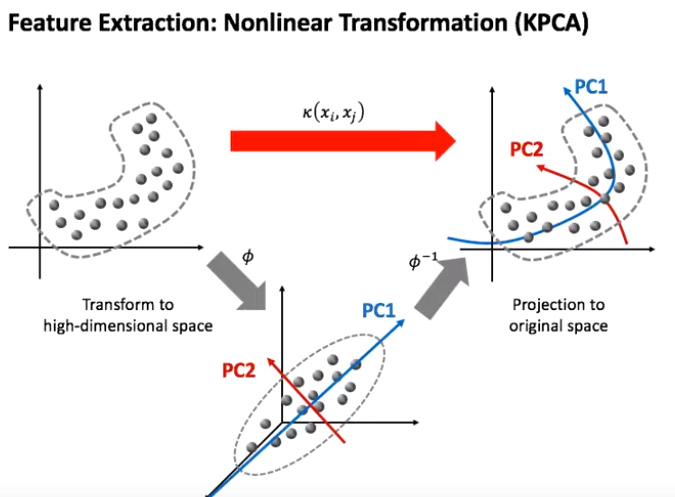

In [34]:
# 대략적인 알고리즘 방법

from IPython.display import Image
Image('KPCA.PNG')

#### 대략적인 KPCA 알고리즘

1. 기존 데이터 (2차원)을 고차원(3차원)으로 mapping 시킨다
2. 고차원으로 mapping된 데이터에 주성분 분석(PCA)를 실시한다
3. 고차원에서 사용할 주성분(PC1, PC2)을 선택한다
4. 고차원에서 mapping된 데이터와 주성분으로 다시 원래 공간(저차원)으로 mapping한다


### 1. Import Packages and Modules

In [22]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import KernelPCA

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 2. Load Data and EDA

In [23]:
# 13개 변수 / 3개 범주

raw_wine = datasets.load_wine()
print(raw_wine.DESCR) # Dataset Description # 13 Features with 3 Classes

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### 3. Data Split and Standardization

In [24]:
X = raw_wine.data  # Features
y = raw_wine.target # Target


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Standardization

In [35]:
std_scale = StandardScaler()
std_scale.fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

### 5. KPCA

In [36]:
# kernel PCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_train_std)
X_train_kpca = k_pca.transform(X_train_std)
X_test_kpca = k_pca.transform(X_test_std)

### 6. Shape of Data before and after KPCA

In [37]:
print(X_train_std.shape) # 13차원에서
print(X_train_kpca.shape)# 2차원으로 줄었음

(124, 13)
(124, 2)


### 7. KPCAed Data

In [28]:
# 고유값 확인
print(k_pca.lambdas_)

# 고유벡터 확인
print(k_pca.alphas_)



[194.70033609 116.28995507]
[[ 0.08382297  0.01684744]
 [ 0.00450779 -0.11470113]
 [-0.13510767  0.12467353]
 [-0.08894513  0.02789055]
 [ 0.0423513  -0.05562207]
 [-0.09817172  0.03338194]
 [-0.13295333  0.11150161]
 [ 0.04374888 -0.01264966]
 [-0.08230742  0.01134934]
 [-0.07007264 -0.01619169]
 [ 0.02385304 -0.11734321]
 [-0.06465069 -0.04460199]
 [-0.0892369   0.02994665]
 [ 0.00498281 -0.07872881]
 [ 0.09531332  0.04845473]
 [-0.01811712 -0.21644309]
 [ 0.09096674 -0.06922294]
 [-0.01263519 -0.06575854]
 [ 0.01690052 -0.01338249]
 [ 0.15672053  0.12012116]
 [ 0.03644232 -0.07970418]
 [ 0.08301924 -0.03020536]
 [-0.14721792  0.08706051]
 [-0.08060787  0.0889219 ]
 [ 0.04665106 -0.11038317]
 [ 0.00085148 -0.10187336]
 [-0.00193121 -0.13351575]
 [-0.11541479  0.10533055]
 [-0.10118218  0.01357499]
 [ 0.13126165  0.0642879 ]
 [-0.1727465   0.14246866]
 [-0.00907319 -0.12452252]
 [-0.01096581 -0.10347845]
 [-0.0310476  -0.05782808]
 [ 0.02800128 -0.09579036]
 [ 0.0608556  -0.14141524]


c:\Users\changhyun\.conda\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\changhyun\.conda\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)


### 8. New Dataframe

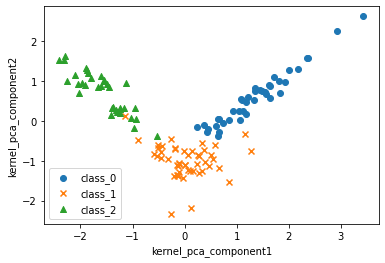

In [31]:
# 차원축소 이후 데이터셋
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_train_kpca, 
                            columns=kpca_columns)
X_tn_kpca_df['target'] = y_train
X_tn_kpca_df.head(5)

df = X_tn_kpca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

### 9. Train Model

In [33]:
# KPCA적용한 데이터로 Randomforest 학습
clf_rf_kpca = RandomForestClassifier(max_depth=2, 
                                     random_state=0)

clf_rf_kpca.fit(X_train_kpca, y_train)

# 예측
pred_rf_kpca = clf_rf_kpca.predict(X_test_kpca)

# kPCA 적용 후 정확도
from sklearn.metrics import accuracy_score
accuracy_kpca = accuracy_score(y_test, pred_rf_kpca)
print(accuracy_kpca)

1.0
